# 평균-분산 최적화(Mean-Variance Optimization) 모형 포트폴리오 산출 기본

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import datetime as dt
from datetime import timedelta
from pylab import *

# 예스트레이더 출력 결과물을 Pandas 형태로 포맷 변환

In [2]:
# 예스트레이더 종목검색 결과를 날짜 기준으로 포맷팅
def convert_yes_price_file(gubun):
    # 우리나라 시간 = 그리니치 표준시 + 9시
    file_dt = (dt.datetime.now() + dt.timedelta(hours=9)).strftime('%Y%m%d')

    yes_price_file = pd.DataFrame()
    # 예스트레이더 출력용 지표식과 칼럼수 일치시켜야 함.
    yes_price_file = pd.read_csv('./yes_stock_price_' + file_dt + '.csv',encoding= 'euc-kr',
                           names = ['날짜1','종목명','종목코드','날짜','시가','고가','저가','종가','거래량',
                                    '단기이평','중기이평','장기이평','지수단기이평','지수중기이평','지수장기이평',
                                    'MACD','MACD_OSC','ATR','CCI','StoK','StoD','TRIX','이격도'],
                           index_col= 1, header=None, dtype={'종목코드':str})

    종목명 = yes_price_file.index.unique()
    종목코드 = yes_price_file['종목코드'].unique()  # 종목코드 사용할 경우를 위해 별도 저장
    df1 = {'종목명':종목명,
           '종목코드':종목코드}
    df1 = pd.DataFrame(df1)
    df1.to_csv('symbol_cd.csv')

    cls_p_data = pd.DataFrame()
    vol_data = pd.DataFrame()
    if gubun == 1:
        hi_p_data = pd.DataFrame()
        lo_p_data = pd.DataFrame()
        sma_data = pd.DataFrame()
        mma_data = pd.DataFrame()
        lma_data = pd.DataFrame()
        sema_data = pd.DataFrame()
        mema_data = pd.DataFrame()
        lema_data = pd.DataFrame()
        macd_data = pd.DataFrame()
        macdo_data = pd.DataFrame()
        atr_data = pd.DataFrame()
        cci_data = pd.DataFrame()
        stok_data = pd.DataFrame()
        stod_data = pd.DataFrame()
        trix_data = pd.DataFrame()
        dis_data = pd.DataFrame()

    for i in range(len(종목명)):
        cls_p = yes_price_file.loc[종목명[i],['날짜','종가']]
        cls_p.set_index(['날짜'],inplace=True)
        cls_p_data = pd.concat([cls_p_data,cls_p],axis=1) 

        vol = yes_price_file.loc[종목명[i],['날짜','거래량']]
        vol.set_index(['날짜'],inplace=True)
        vol_data = pd.concat([vol_data,vol],axis=1) 

        if gubun == 1:
            hi_p = yes_price_file.loc[종목명[i],['날짜','고가']]
            hi_p.set_index(['날짜'],inplace=True)
            hi_p_data = pd.concat([hi_p_data,hi_p],axis=1) 

            lo_p = yes_price_file.loc[종목명[i],['날짜','저가']]
            lo_p.set_index(['날짜'],inplace=True)
            lo_p_data = pd.concat([lo_p_data,lo_p],axis=1) 

            sma = yes_price_file.loc[종목명[i],['날짜','단기이평']]
            sma.set_index(['날짜'],inplace=True)
            sma_data = pd.concat([sma_data,sma],axis=1) 

            mma = yes_price_file.loc[종목명[i],['날짜','중기이평']]
            mma.set_index(['날짜'],inplace=True)
            mma_data = pd.concat([mma_data,mma],axis=1) 

            lma = yes_price_file.loc[종목명[i],['날짜','장기이평']]
            lma.set_index(['날짜'],inplace=True)
            lma_data = pd.concat([lma_data,lma],axis=1) 

            atr = yes_price_file.loc[종목명[i],['날짜','ATR']]
            atr.set_index(['날짜'],inplace=True)
            atr_data = pd.concat([atr_data,atr],axis=1) 

    cls_p_data.columns = 종목명
    print('\n 종가데이터 \n', cls_p_data.head())
    cls_p_data.to_csv('cls_p_data.csv')

    vol_data.columns = 종목명
    print('\n 거래량 \n', vol_data.head())
    vol_data.to_csv('volume_data.csv')

    if gubun == 1:
        hi_p_data.columns = 종목명
        print('\n 고가데이터 \n', hi_p_data.head())
        hi_p_data.to_csv('hi_p_data.csv')

        lo_p_data.columns = 종목명
        print('\n 저가데이터 \n', lo_p_data.head())
        lo_p_data.to_csv('lo_p_data.csv')

        sma_data.columns = 종목명
        print('\n 단기이평 \n', sma_data.head())
        sma_data.to_csv('sma_data.csv')

        mma_data.columns = 종목명
        print('\n 중기이평 \n', mma_data.head())
        mma_data.to_csv('mma_data.csv')

        lma_data.columns = 종목명
        print('\n 장기이평 \n', lma_data.head())
        lma_data.to_csv('lma_data.csv')

        atr_data.columns = 종목명
        print('\n ATR \n', atr_data.head())
        atr_data.to_csv('atr_data.csv')

In [3]:
gubun = 0 # 지표 파일을 만들려면 1로, 안 만들여면 0
convert_yes_price_file(gubun)  


 종가데이터 
 종목명          나노메딕스     필룩스     부산산업   카리스국보    동성제약  에이프로젠 KIC   엔케이물산  \
날짜                                                                       
20151021.0  2585.0  2233.0  32200.0  1508.0  5260.0     3085.0  1226.0   
20151022.0  2560.0  2180.0  31650.0  1546.0  5140.0     3045.0  1193.0   
20151023.0  2650.0  2228.0  31900.0  1496.0  5100.0     3060.0  1217.0   
20151026.0  2560.0  2233.0  33600.0  1442.0  5110.0     3105.0  1197.0   
20151027.0  3100.0  2233.0  33350.0  1521.0  5160.0     3030.0  1209.0   

종목명          웰바이오텍    일신석재     남광토건    삼일제약    인스코비    인디에프       조비   대호에이엘  \
날짜                                                                             
20151021.0  2675.0  1430.0  11050.0  6790.0  1450.0  2420.0  13550.0  1202.0   
20151022.0  2485.0  1340.0  10800.0  6675.0  1395.0  2625.0  13100.0  1159.0   
20151023.0  2590.0  1365.0  11300.0  6733.0  1375.0  2600.0  13600.0  1175.0   
20151026.0  2690.0  1330.0  11150.0  6733.0  1420.0  2660.0  13350.0  1

# 사용자 함수 선언

In [4]:
def statistics(w,r,c):
    '''포트폴리오 총계치 출력
    인수
    =====
    weight : array-like  포트폴리오 내의 비중
    
    반환값
    ======
    portfolio_return     : float 포트폴리오 수익률 기댓값
    portfolio_volatility : float 포트폴리오 변동성 기댓값
    sharpe_ratio         : float 무위험 이자율이 0일 때의 샤프 지수
    '''
    w = np.array(w)
    portfolio_return = np.sum(r * w)
    portfolio_volatility = np.sqrt(np.dot(w.T,np.dot(c, w)))
    sharp_ratio = portfolio_return / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharp_ratio])

In [5]:
def min_func_sharpe(w,r,c):
# 최소화문제에서 샤프지수 최대값을 찾으려면 샤프지수의 음수 값을 최소화하면 된다.
    return -statistics(w,r,c)[2]  # 위에서 만든 statistics의 3번째 값이 샤프지수

In [6]:
def min_func_variance(w,r,c):
# 분산 최소화 함수
    return statistics(w,r,c)[1]**2

In [7]:
def solve_frontier(r,c):
    def min_func_port(w,r,c):
        return statistics(w,r,c)[1]  # 두번째 값 변동성의 최소화
    def port_return(w):
        return np.sum(r * w)
    mean, vol = [], []
    for t in linspace(min(r), max(r), num=50): # Iterate through the range of returns on Y axis
        # 제약조건
        cons = ({'type': 'eq', 'fun': lambda x:  port_return(x) - t},
                {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
        # 범위값
        bnds = tuple((0, 1) for x in range(noa))
        opts = sco.minimize(min_func_port, noa * [1. / noa, ],(r,c), method='SLSQP', constraints=cons, bounds=bnds)
        if not opts.success:
            raise BaseException(opts.message)
        # add point to the min-var frontier [x,y] = [opts.x, t]
        mean.append(t)                                                 # return
        vol.append(statistics(opts['x'],r,c)[1])   # min-variance based on optimized weights

    return array(mean), array(vol)

In [8]:
def display_Efficient_frontier(r,c):
    mean, vol = solve_frontier(r,c)
    plot(vol, mean, color='black'), grid(True)  # draw efficient frontier

# Main

In [9]:
공분산_산출기간 = 500  # 시뮬레이터를 통해 최적 값 찾을 것

raw_data = pd.read_csv('cls_p_data.csv',index_col=['날짜'], parse_dates=['날짜'])
종목명 = raw_data.columns
print('\n >> 종목명 :', 종목명)


 >> 종목명 : Index(['나노메딕스', '필룩스', '부산산업', '카리스국보', '동성제약', '에이프로젠 KIC', '엔케이물산', '웰바이오텍',
       '일신석재', '남광토건', '삼일제약', '인스코비', '인디에프', '조비', '대호에이엘', '파미셀', '동양철관',
       '동양네트웍스', '일성건설'],
      dtype='object')


In [10]:
noa = len(종목명)  # 자산수

symbol_data = pd.read_csv('symbol_cd.csv',index_col=None,dtype={'종목코드':str})
종목코드 = symbol_data['종목코드']
print('\n >> 종목코드 :', 종목코드)


 >> 종목코드 : 0     074610
1     033180
2     011390
3     001140
4     002210
5     007460
6     009810
7     010600
8     007110
9     001260
10    000520
11    006490
12    014990
13    001550
14    069460
15    005690
16    008970
17    030790
18    013360
Name: 종목코드, dtype: object


In [11]:
work_data = raw_data.iloc[-공분산_산출기간:]
현재가 = list(raw_data.iloc[-1])
print('\n >> 현재가 :', 현재가)


 >> 현재가 : [9900.0, 9890.0, 171500.0, 3655.0, 17900.0, 2200.0, 755.0, 2500.0, 3005.0, 12750.0, 21500.0, 3295.0, 3070.0, 18150.0, 5210.0, 8220.0, 1150.0, 594.0, 1385.0]


In [12]:
로그수익률 = np.log(work_data / work_data.shift(1))
print(로그수익률.head())

               나노메딕스       필룩스      부산산업     카리스국보      동성제약  에이프로젠 KIC  \
날짜                                                                        
20171103.0       NaN       NaN       NaN       NaN       NaN        NaN   
20171106.0 -0.025508 -0.001761 -0.013226 -0.002020  0.043430  -0.027337   
20171107.0  0.004549 -0.008496 -0.005935 -0.009142  0.001249  -0.009281   
20171108.0  0.006033 -0.008568  0.005935 -0.010257  0.013639   0.011588   
20171109.0  0.120286 -0.010452 -0.005935  0.000000  0.012240   0.092373   

               엔케이물산     웰바이오텍      일신석재      남광토건      삼일제약      인스코비  \
날짜                                                                       
20171103.0       NaN       NaN       NaN       NaN       NaN       NaN   
20171106.0  0.000000  0.025243 -0.007813  0.001496  0.001228 -0.012780   
20171107.0 -0.009337  0.054222  0.000000  0.008929  0.000000  0.003210   
20171108.0 -0.003759  0.054067  0.007813 -0.016431  0.013003  0.012739   
20171109.0  0.011236  0.002628

In [13]:
R = 로그수익률.mean() * 252  # 연수익률
print(R)

나노메딕스        0.543461
필룩스          0.629756
부산산업         0.813519
카리스국보        0.659107
동성제약         0.778693
에이프로젠 KIC   -0.005706
엔케이물산        0.171127
웰바이오텍       -0.144018
일신석재         0.429016
남광토건         0.326445
삼일제약         0.543706
인스코비         0.372774
인디에프         0.459865
조비           0.219587
대호에이엘        0.839145
파미셀          0.330760
동양철관         0.027061
동양네트웍스      -0.512874
일성건설         0.116349
dtype: float64


In [14]:
C = 로그수익률.cov() * 252 # 공분산 
print(C)

              나노메딕스       필룩스      부산산업     카리스국보      동성제약  에이프로젠 KIC  \
나노메딕스      1.041032  0.144542  0.026471  0.025085  0.155194   0.100015   
필룩스        0.144542  0.969997  0.038138  0.007118  0.137566   0.118202   
부산산업       0.026471  0.038138  0.919179  0.251895 -0.030373   0.011978   
카리스국보      0.025085  0.007118  0.251895  0.891146 -0.029217   0.016318   
동성제약       0.155194  0.137566 -0.030373 -0.029217  0.823501   0.167480   
에이프로젠 KIC  0.100015  0.118202  0.011978  0.016318  0.167480   0.806656   
엔케이물산      0.078689  0.010688  0.151384  0.145457 -0.006650  -0.012235   
웰바이오텍      0.074819 -0.006179 -0.046973  0.031476  0.003666   0.074715   
일신석재       0.076416  0.097333  0.464088  0.261500 -0.000092   0.048541   
남광토건       0.045951  0.083903  0.388177  0.220863  0.042496   0.036640   
삼일제약       0.173770  0.132069 -0.020898  0.025951  0.261328   0.114999   
인스코비       0.086750  0.150674  0.045100  0.020781  0.110774   0.089725   
인디에프       0.053878  0.054116  0.35223

In [15]:
# 제약조건
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 4},   #매수 종목이 5 종목 이상되도록 조건 설정 
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 3},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 2},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 1}) 

# 범위값
bnds = tuple((0, 1) for x in range(noa))

opts = sco.minimize(min_func_sharpe, noa * [1. / noa, ], (R, C), method='SLSQP', bounds=bnds, constraints=cons)
optsx = (opts['x'] * 100).round(3)  # 샤프지수 최대 포트폴리오 결과값
stat = statistics(opts['x'],R,C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print(opts)  # x값이 포트폴리오 비중
print(stat)

     fun: -1.646899573249612
     jac: array([ -7.22557306e-05,   9.92506742e-04,   2.37748027e-04,
         1.72168016e-03,  -1.30839646e-03,   6.01949796e-01,
        -4.98950481e-04,   3.36209789e-01,   4.71356377e-01,
         7.17689440e-01,  -1.18894875e-03,  -1.28652155e-03,
         3.38782474e-01,   8.16100448e-01,   3.59281898e-04,
         1.33564413e-01,   1.53026761e+00,   1.73491016e+00,
         9.34476793e-01])
 message: 'Optimization terminated successfully.'
    nfev: 218
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([  6.10728391e-02,   1.10990869e-01,   8.35050126e-02,
         1.25353444e-01,   2.03129879e-01,   1.38656077e-18,
         4.22971989e-03,   1.85726557e-16,   1.13751078e-17,
         3.55148634e-17,   1.07517656e-01,   3.38456170e-02,
         0.00000000e+00,   0.00000000e+00,   2.70354964e-01,
         1.46256000e-16,   3.67050694e-16,   1.03782314e-15,
         3.16873286e-16])
[ 0.71   0.431  1.647]


In [16]:
stat = statistics(opts['x'],R,C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print('\n>> 수익률 = ', stat[0],', 표준편차 = ', stat[1], ', 샤프지수 = ', stat[2])


>> 수익률 =  0.71 , 표준편차 =  0.431 , 샤프지수 =  1.647


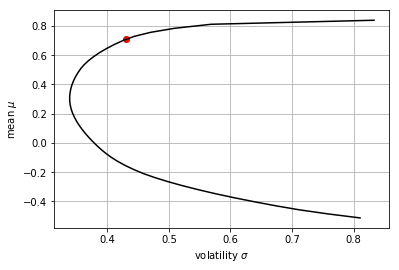

,나노메딕스,필룩스,부산산업,카리스국보,동성제약,에이프로젠 KIC,엔케이물산,웰바이오텍,일신석재,남광토건,삼일제약,인스코비,인디에프,조비,대호에이엘,파미셀,동양철관,동양네트웍스,일성건설
비중,0.061073,0.110991,0.083505,0.125353,0.20313,1.386561e-18,0.00423,1.857266e-16,1.137511e-17,3.551486e-17,0.107518,0.033846,0.0,0.0,0.270355,1.462560e-16,3.670507e-16,1.037823e-15,3.168733e-16


In [17]:
display_Efficient_frontier(R,C)
scatter(stat[1], stat[0], marker='o', color='red'), grid(True)
xlabel('volatility $\sigma$'), ylabel('mean $\mu$'), show()
display(pd.DataFrame({'비중': opts['x']}, index=종목명).T)

In [18]:
# 우리나라 시간 = 그리니치 표준시 + 9시
current_dt = (dt.datetime.now() + dt.timedelta(hours=9)).strftime('%Y%m%d')
date_col = [current_dt for i in range(noa)] # 날짜 칼럼 생성
print(date_col)
print(list(optsx))

['20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119', '20191119']
[6.1070000000000002, 11.099, 8.3510000000000009, 12.535, 20.312999999999999, 0.0, 0.42299999999999999, 0.0, 0.0, 0.0, 10.752000000000001, 3.3849999999999998, 0.0, 0.0, 27.035, 0.0, 0.0, 0.0, 0.0]


In [19]:
mp = {'날짜':date_col,
      '종목명':종목명,
      '종목코드':종목코드,
      '비중':list(optsx),
      '현재가':현재가}
df1 = pd.DataFrame(mp,columns = ['날짜','종목명','종목코드','비중','현재가'])
print(df1)
df1.to_csv('MVO_model_portfolio_'+current_dt+'.csv', index=None)

          날짜        종목명    종목코드      비중       현재가
0   20191119      나노메딕스  074610   6.107    9900.0
1   20191119        필룩스  033180  11.099    9890.0
2   20191119       부산산업  011390   8.351  171500.0
3   20191119      카리스국보  001140  12.535    3655.0
4   20191119       동성제약  002210  20.313   17900.0
5   20191119  에이프로젠 KIC  007460   0.000    2200.0
6   20191119      엔케이물산  009810   0.423     755.0
7   20191119      웰바이오텍  010600   0.000    2500.0
8   20191119       일신석재  007110   0.000    3005.0
9   20191119       남광토건  001260   0.000   12750.0
10  20191119       삼일제약  000520  10.752   21500.0
11  20191119       인스코비  006490   3.385    3295.0
12  20191119       인디에프  014990   0.000    3070.0
13  20191119         조비  001550   0.000   18150.0
14  20191119      대호에이엘  069460  27.035    5210.0
15  20191119        파미셀  005690   0.000    8220.0
16  20191119       동양철관  008970   0.000    1150.0
17  20191119     동양네트웍스  030790   0.000     594.0
18  20191119       일성건설  013360   0.000    1385.0
